In [98]:
import importlib
import SIPD_utils
importlib.reload(SIPD_utils)
import numpy as np
import matplotlib.pyplot as plt


(500, 1)
(500, 1)
(500, 1)
(500, 1)
(500, 1)
(500, 1)
1
(1000,)
(1000, 1)
sum:  (1000, 1)
(1000, 1)


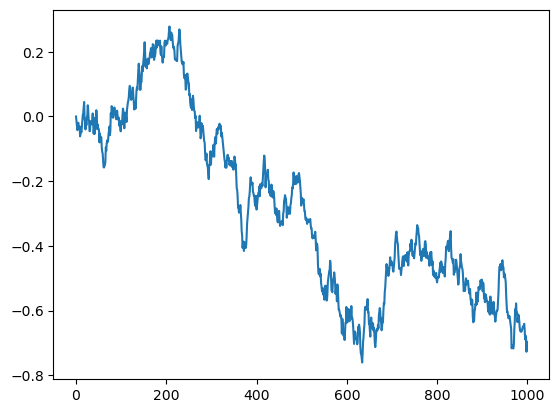

In [79]:
means = np.array([1,2, 2.5, 3.5, 4])
weights = np.array([.3, .1, .1, .2, .3])
variances = np.array([.03, .03, .03, .03, .03])

xlist = np.arange(0, 5, .01)

true_scale = SIPD_utils.make_scale(means.reshape(-1,1), weights, variances.reshape((5,1,1)))
true_pdf = SIPD_utils.get_pdf(true_scale, xlist.reshape(-1, 1))
print(true_scale.n_features_in_)
true_drift = SIPD_utils.gen_drift(noise=.02, trend=0, length=1000)
print(np.shape(true_drift))
#drift = (np.arange(3000)*2/3000).reshape(-1,1)


f0=SIPD_utils.gen_f0(true_scale, true_drift)
print(np.shape(f0))
plt.plot(true_drift)


In [54]:
#plt.plot(f0, 'bo')

In [80]:
p=SIPD_utils.SIPDParams()
p.n_peaks = 5
p.n_reps =4
p.drift_rate = .002
m = SIPD_utils.SIPD(p)

inferred_scale = m.infer_scale(f0)

inferred_scale.means_

inferred_drift = m.infer_drift(f0, inferred_scale)

#plt.plot(inferred_drift)
print(np.shape(f0))
m.run(f0)
#plt.plot(drift)

(1000, 1)
(1000, 1)
drift0:  (1000, 1)
f0:  (1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


GaussianMixture(n_components=5, random_state=0)
[[[0.03]]

 [[0.03]]

 [[0.03]]

 [[0.03]]

 [[0.03]]]
[[[0.02734194]]

 [[0.03375007]]

 [[0.02958235]]

 [[0.02973609]]

 [[0.03576232]]]
[[3.78882048]
 [0.58404033]
 [2.06740128]
 [1.24908052]
 [3.21570731]]
[[4.10508768]
 [1.08352848]
 [2.5658647 ]
 [3.59194962]
 [2.0921773 ]]
[[3.97429916]
 [0.97209005]
 [2.472735  ]
 [3.45721261]
 [1.99664627]]
(500, 1)
(500, 1)
(500, 1)
(500, 1)
(500, 1)
(500, 1)
(500, 1)
(500, 1)
(500, 1)
(500, 1)
(500, 1)
(500, 1)


GaussianMixture(n_components=5, random_state=0)

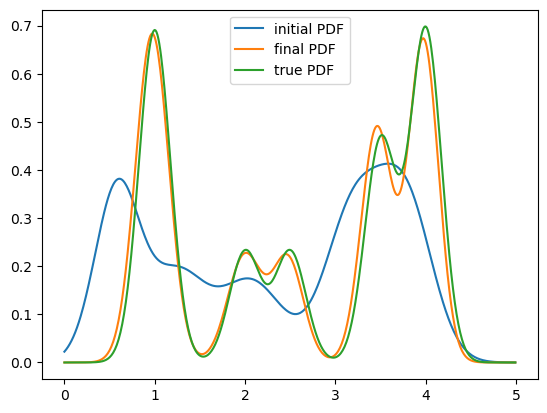

In [81]:
print(m.all_scales[0])

print(scale.covariances_)
print(m.all_scales[-1].covariances_)

print(np.sort(m.all_scales[0].means_))
print(np.sort(m.all_scales[1].means_))
print(np.sort(m.all_scales[-1].means_))
    

pdf_0 = SIPD_utils.get_pdf(m.all_scales[0], xlist.reshape(-1, 1))
pdf_end = SIPD_utils.get_pdf(m.all_scales[-1], xlist.reshape(-1, 1))

plt.plot(xlist, pdf_0 )
plt.plot(xlist, pdf_end )
plt.plot(xlist, true_pdf )
plt.legend(['initial PDF', 'final PDF', 'true PDF'])


m.all_scales[0]

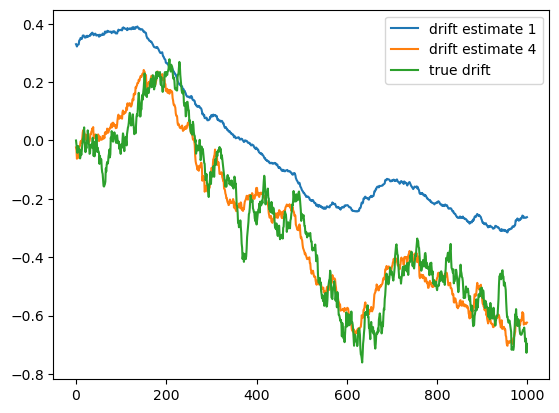

In [82]:

plt.plot(m.all_drift[1])
plt.plot(m.all_drift[4])
plt.plot(true_drift)
plt.legend(["drift estimate 1", "drift estimate 4", "true drift"])


In [87]:
import csv

f0 = []
t_list = []
with open('Kwaikiutl 2-08 A8_ Whale Song.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        #print(row[0].split(',')[0])
        if row[0].split(',')[1] != '0':
            t_list.append(row[0].split(',')[0])
            f0.append(row[0].split(',')[1])

f0=f0[0::10]
f0 = np.array([np.log2(float(i)) for i in f0]).reshape(-1,1)
t_list = t_list[0::10]
t_list = np.array([float(i) for i in t_list])
len(f0)

1428

In [ ]:
plt.plot(f0)
p=SIPD_utils.SIPDParams()
p.n_peaks = 3
p.n_reps =4
p.drift_rate = .001
m = SIPD_utils.SIPD(p)

inferred_scale = m.infer_scale(f0)

inferred_scale.means_

inferred_drift = m.infer_drift(f0, inferred_scale)

#plt.plot(inferred_drift)
print(np.shape(f0))
m.run(f0)


(1428, 1)
(1428, 1)
drift0:  (1428, 1)
f0:  (1428, 1)
(1428, 1)
(1428, 1)


In [ ]:
xlist = np.arange(5, 9, .01)

pdf_0 = SIPD_utils.get_pdf(m.all_scales[0], xlist.reshape(-1, 1))
pdf_end = SIPD_utils.get_pdf(m.all_scales[-1], xlist.reshape(-1, 1))

plt.plot(xlist, pdf_0 )
plt.plot(xlist, pdf_end )
plt.legend(['initial PDF', 'final PDF', 'true PDF'])
plt.figure()
plt.plot(m.all_drift[1])
plt.plot(m.all_drift[4])
plt.legend(["drift estimate 1", "drift estimate 4", "true drift"])

plt.figure()
plt.plot(m.all_f0[0])
plt.plot(m.all_f0[3])